In [2]:
import torch

if torch.cuda.is_available():
    print(f"CUDA is available! GPU detected: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is NOT available. Training will run on CPU.")


CUDA is available! GPU detected: NVIDIA RTX A6000


In [3]:
import yaml

data = {
    'train': './dataset_face/images/train',
    'val': './dataset_face/images/val',
    'test': './dataset_face/images/test',
    'nc': 1,
    'names': ['face']
}

with open('faces.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("faces.yaml saved successfully!")


faces.yaml saved successfully!


train: 12047 images


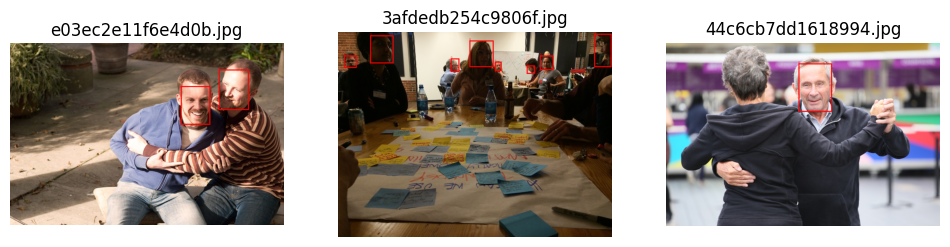

val: 3347 images


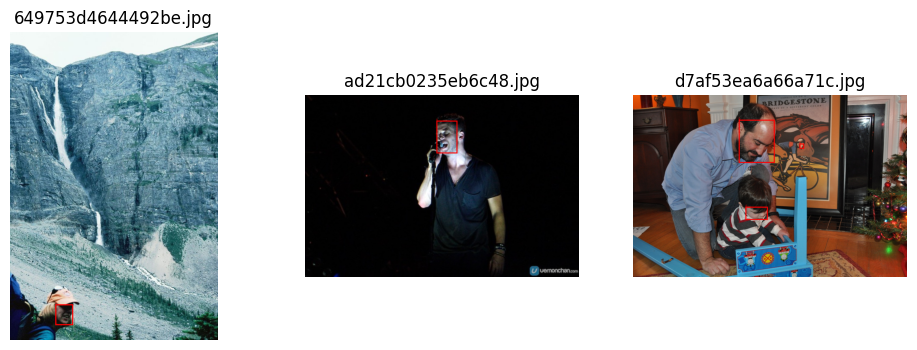

test: 1339 images


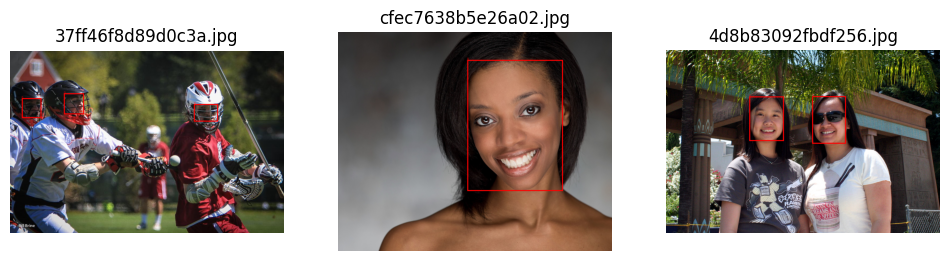

In [4]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

image_base = "./dataset_face/images"
label_base = "./dataset_face/labels" 
splits = ["train", "val", "test"]

for split in splits:
    image_dir = os.path.join(image_base, split)
    label_dir = os.path.join(label_base, split)

    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"{split}: {len(image_files)} images")

    samples = random.sample(image_files, min(3, len(image_files)))

    plt.figure(figsize=(12, 4))
    for i, img_name in enumerate(samples):
        img_path = os.path.join(image_dir, img_name)
        label_path = os.path.join(label_dir, os.path.splitext(img_name)[0] + ".txt")

        img = Image.open(img_path).convert("RGB")
        draw = ImageDraw.Draw(img)
        width, height = img.size

        # Read labels and draw boxes
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue
                    class_id, x_center, y_center, w, h = map(float, parts)
                    # Convert YOLO normalized coordinates to pixel coordinates
                    x1 = (x_center - w/2) * width
                    y1 = (y_center - h/2) * height
                    x2 = (x_center + w/2) * width
                    y2 = (y_center + h/2) * height
                    draw.rectangle([x1, y1, x2, y2], outline="red", width=4)
                    draw.text((x1, y1-10), str(int(class_id)), fill="red")

        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis("off")
    plt.show()


In [5]:
from ultralytics import YOLO
import torch
model = YOLO("yolov8n.pt")

pytorch_model = model.model

# Count parameters
total_params = sum(p.numel() for p in pytorch_model.parameters())
trainable_params = sum(p.numel() for p in pytorch_model.parameters() if p.requires_grad)

print(f"Parameters: {total_params:,}")



Parameters: 3,157,200


In [7]:

model.train(
    data="faces.yaml",
    epochs=5,
    imgsz=640,

    
    batch=2,              
    workers=0,            
    cache=False,          
    mosaic=0.5,           
    amp=True,             
    rect=True,            

    # Training params
    lr0=0.001,
    lrf=0.1,
    project="yolo",
    name="yolov8n_face_detection",
    device=0,
    save_period=5
)

print("Training complete!")


New https://pypi.org/project/ultralytics/8.3.240 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.204 🚀 Python-3.9.23 torch-2.2.0+cu121 CUDA:0 (NVIDIA RTX A6000, 48532MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=faces.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=yolov8n_face_detection, nbs=64, nms=False, opset=Non

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3959.2±1480.0 MB/s, size: 314.1 KB)
train: Scanning /home/siu855621720/Research/face-emotion-analysis/face_detection/dataset_face/labels/train.cache... 12047 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 12047/12047 17.6Mit/s 0.0s
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5131.2±1413.3 MB/s, size: 355.2 KB)
val: Scanning /home/siu855621720/Research/face-emotion-analysis/face_detection/dataset_face/labels/val.cache... 3347 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 3347/3

KeyboardInterrupt: 